In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns


Decision Trees
==============

En este ejercicio, aprenderás un algoritmo muy popular de machine learning llamado Árboles de Decisión. Utilizarás un algoritmo de clasificación para construir un modelo basado en datos históricos de pacientes y sus respectivos medicamentos. Luego, utilizarás el árbol de decisión recién entrenado para predecir la clase de paciente desconocido o para encontrar la droga adecuada para el mismo.

Librerias:


In [3]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Acerca del set de datos

Imagina que eres un investigador médico recolectando datos para un estudio. Has colectado datos de un grupo de pacientes, todos sufrieron la misma enfermedad, dataset en el GES. Durante su tratamiento, cada paciente respondio a una de 5 medicaciones, Droga A, Droga B, Droga c, Droga x e y.

Parte de tu trabajo es construir un modelo para encontrar la droga apropiada para un próximo paciente con la misma enfermedad. El conjunto de características son Edad, Sexo, Presión Sanguínea y Colesterol. El objetivo es la droga ante la cual cada paciente respondió.

Este es un ejemplo de un clasificador binario donde puedes utilizar un set de entrenamiento del set de datos para construir un árbol de decisión para predecir la clase de pacientes desconocidos o para prescribirle a un nuevo paciente.

### Cargar datos

In [6]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Práctica

¿Cuál es el tamaño de los datos? 



In [8]:
my_data.shape

(200, 6)

Pre-procesamiento
-----------------

Utilizando **my\_data** como los datos de panda el archivo drug200.csv, declara las siguientes variables:  

In [9]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Como te puedes imaginar, algunas características son de categoría, tales como Sex o BP. Desafortunadamente, los árboles de Decisión Sklearn no manejan variables categóricas. Pero las podemos convertir en valores numéricos. **pandas.get\_dummies()** Convertir variable categórica en indicadores de variables.

In [11]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])

X[:,1] = le_sex.transform(X[:,1]) 
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 
X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Ahora, podemos completar la variable objetivo (target).

In [12]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


Configurando el Arbol de Decisión
---------------------------------

Estaremos utilizando **entrenar/probar separar** en nuestro **árbol de decisión**. Importemos **train\_test\_split** de **sklearn.cross\_validation**.

In [13]:
from sklearn.model_selection import train_test_split

Ahora **train\_test\_split** devolverá 4 parámetros diferentes. Los nombraremos: X\_trainset, X\_testset, y\_trainset, y\_testset

El **train\_test\_split** necesitará los parámetros: X, y, test\_size=0.3, and random\_state=3.

In [14]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

Modelando
---------

Primero crearemos una instancia del **DecisionTreeClassifier** llamada **drugTree**. Dentro del clasificador, especificaremos _criterion="entropy"_ para que podamos ver la nueva información de cada nodo.

In [15]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # muestra los parámetros por omisión

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Luego, adaptaremos los datos con la matriz de entrenamiento **X\_trainset** y el vector de respuesta **y\_trainset**

In [16]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Predicción
----------

Ahora hagamos algunas **predicciones** en el dataset de pruebas y guardémoslas en una variable llamada **predTree**.

In [17]:
predTree = drugTree.predict(X_testset)

Puedes imprimir **predTree** y **y\_testset** si quieres comparar visualmente la predicción con los valores actuales.

In [18]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


Evaluación
----------

Luego, importemos **metrics** de sklearn y revisemos la precisión de nuestro modelo.

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_testset, predTree))

Precisión de los Arboles de Decisión:  0.9833333333333333


**Accuracy classification score** calcula la precisión del subconjunto: las etiquetas predichas para una muestra deben coincidir con las correspondientes etiquetas en y\_true.

En la clasificación multietiqueta, la función devuelve un subconjunto de precisión. Si el conjunto de etiquetas predichas para una muestra coincide totalmente con el conjunto de etiquetas, entonces la precisión del subconjunto es 1.0; de no ser así, es 0.0.

Visualización
-------------

Observemos el árbol

In [24]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

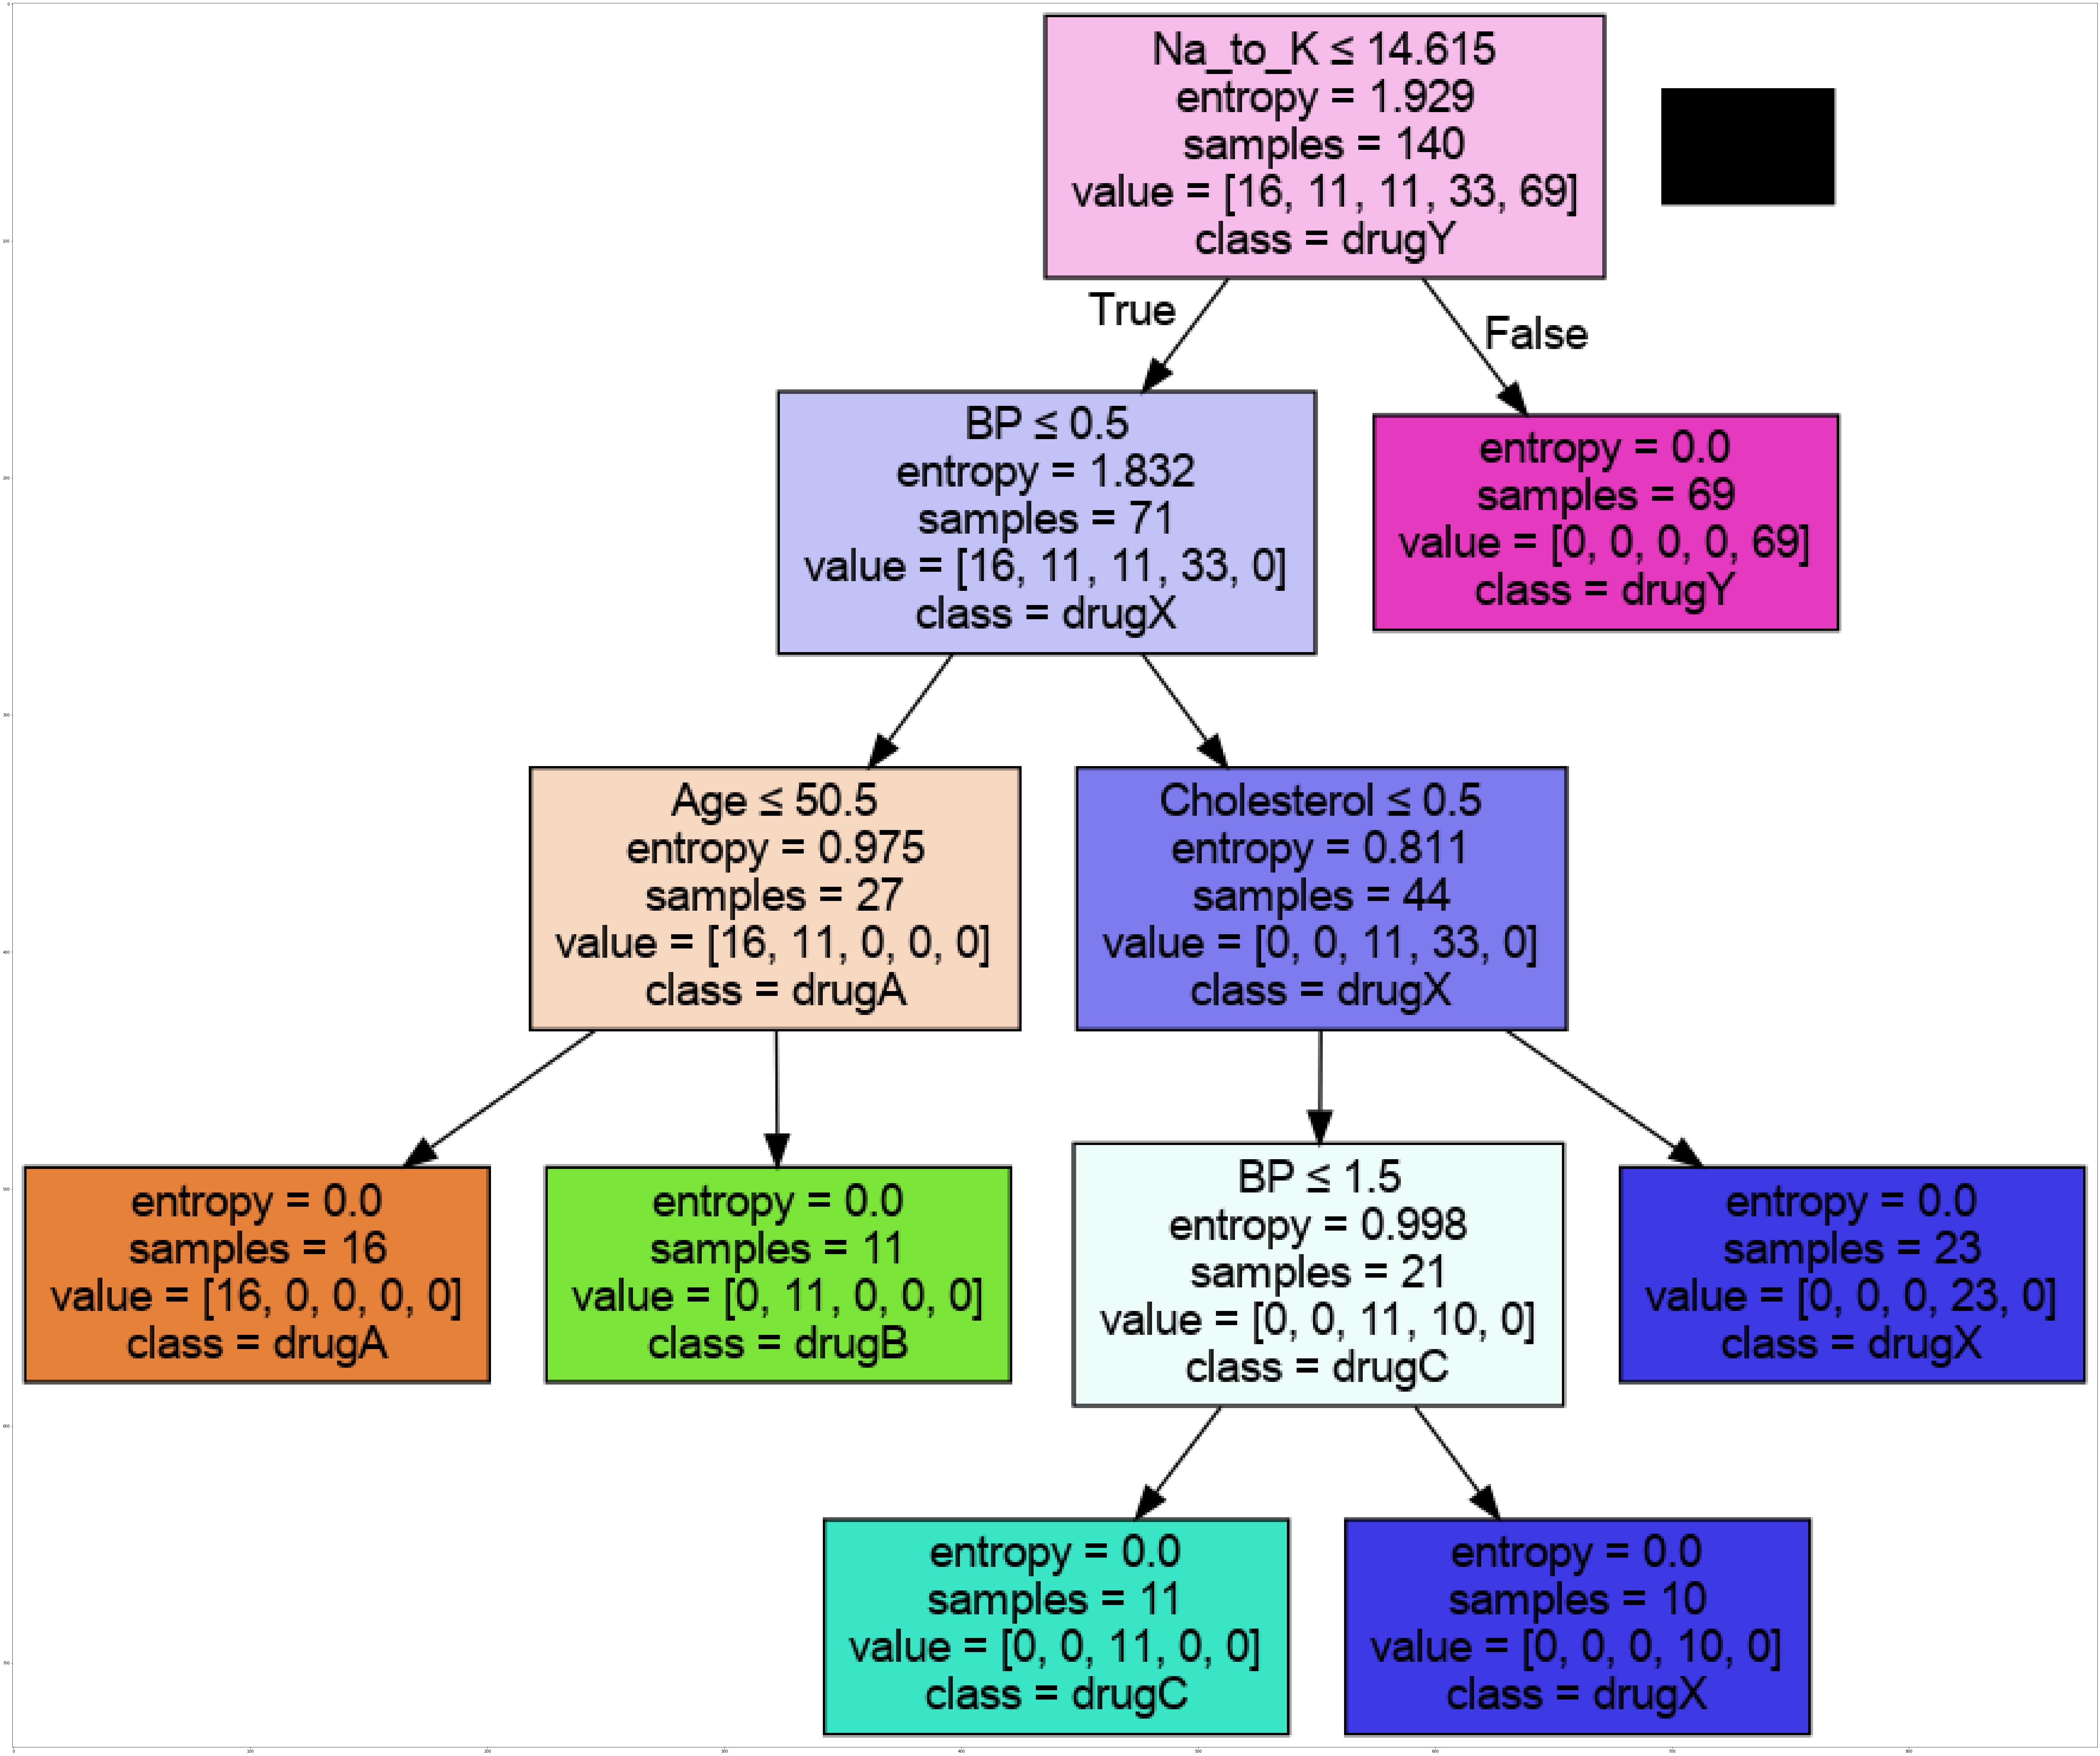

In [25]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')